In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

“Game, Set, Match!”

No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. Today you will put your linear regression knowledge to the test to better understand what it takes to be an all-star tennis player.

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

In [9]:
# load and investigate the data here:
df = pd.read_csv("tennis_stats.csv")
print(df.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?

In [10]:
# perform exploratory analysis here:
print(df.dtypes)
print("////////////////////")
print(df.info())
print("////////////////////")
print(df.describe(include = 'all'))
print("////////////////////")
print(df.isnull().sum())

Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object
////////////////////
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172

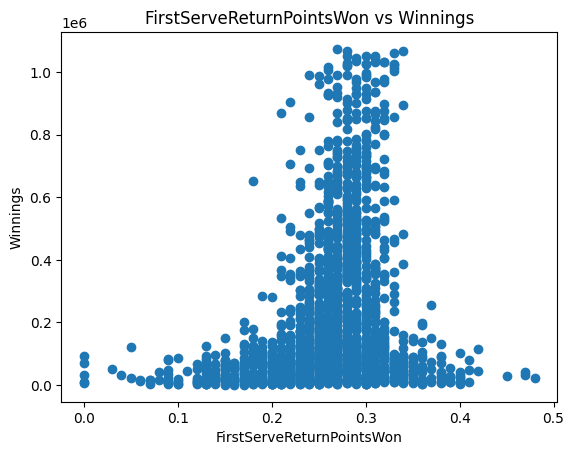

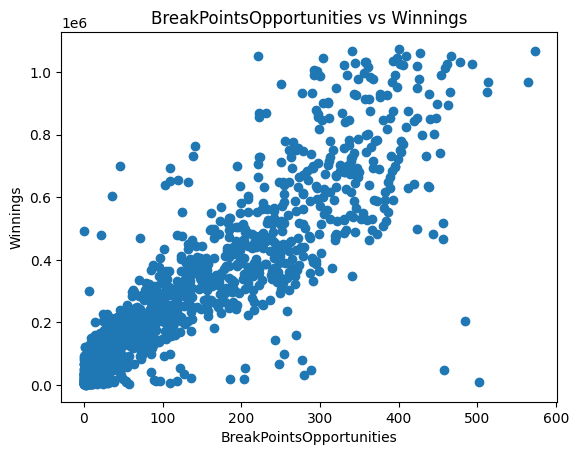

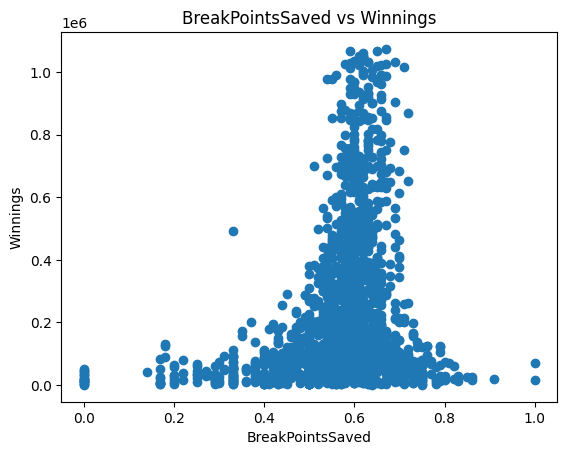

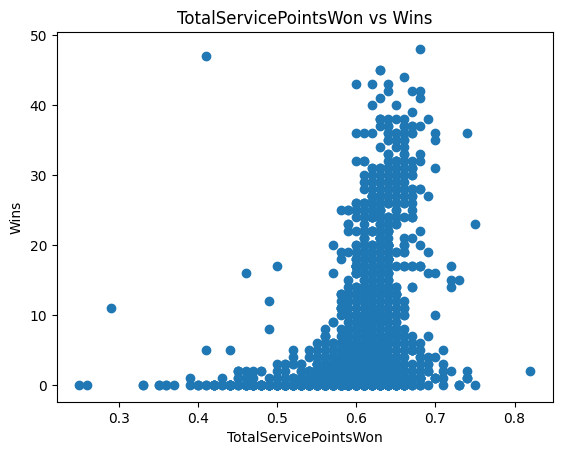

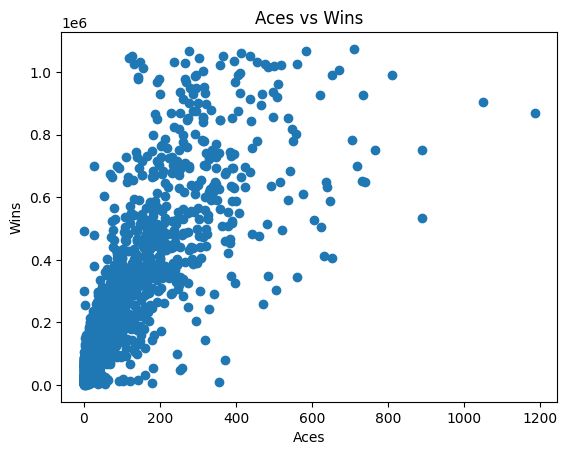

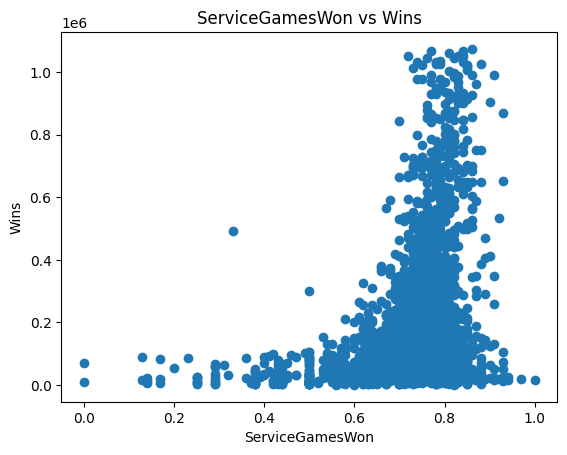

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(df.FirstServeReturnPointsWon, df.Winnings)
plt.title('FirstServeReturnPointsWon vs Winnings')
plt.xlabel('FirstServeReturnPointsWon')
plt.ylabel('Winnings')
plt.show()
plt.clf()


plt.scatter(df.BreakPointsOpportunities, df.Winnings)
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings')
plt.show()
plt.clf()


plt.scatter(df.BreakPointsSaved, df.Winnings)
plt.title('BreakPointsSaved vs Winnings')
plt.xlabel('BreakPointsSaved')
plt.ylabel('Winnings')
plt.show()
plt.clf()


plt.scatter(df.TotalServicePointsWon,df.Wins)
plt.title('TotalServicePointsWon vs Wins')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Wins')
plt.show()
plt.clf()


plt.scatter(df.Aces, df.Winnings)
plt.title('Aces vs Wins')
plt.xlabel('Aces')
plt.ylabel('Wins')
plt.show()
plt.clf()


plt.scatter(df.ServiceGamesWon, df.Winnings)
plt.title('ServiceGamesWon vs Wins')
plt.xlabel('ServiceGamesWon')
plt.ylabel('Wins')
plt.show()
plt.clf()

Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, split your data into training and test datasets so that you can evaluate your model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

Predicting Winnings with BreakPointsOpportunities Test Score: 0.8238295754616898


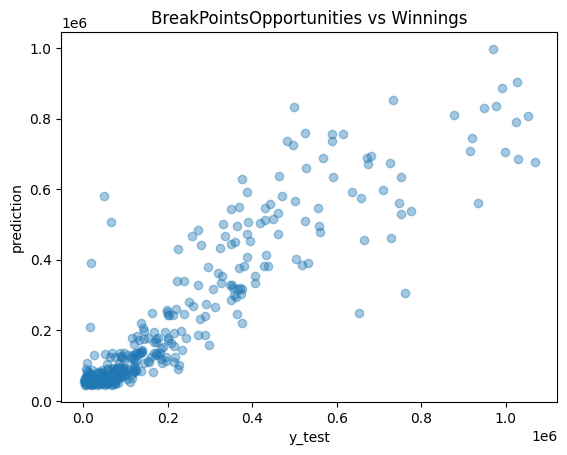

<Figure size 640x480 with 0 Axes>

In [11]:
## perform single feature linear regressions here:
from sklearn.model_selection import train_test_split
model = LinearRegression()


x = df[["BreakPointsOpportunities"]]
y = df[["Winnings"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)
# score model on test data
print('Predicting Winnings with BreakPointsOpportunities Test Score:', model.score(x_test,y_test))
prediction = model.predict(x_test)
plt.scatter(y_test,prediction, alpha=0.4)
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()
plt.clf()

Create a few more linear regression models that use one feature to predict one of the outcomes. Which model that you create is the best?

Predicting Winnings with Aces Test Score: 0.5726582398439416


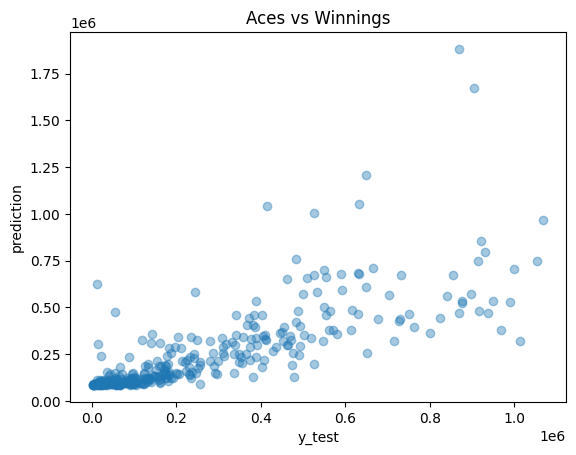

Predicting Winnings with TotalServicePointsWon Test Score: 0.16863798808642827


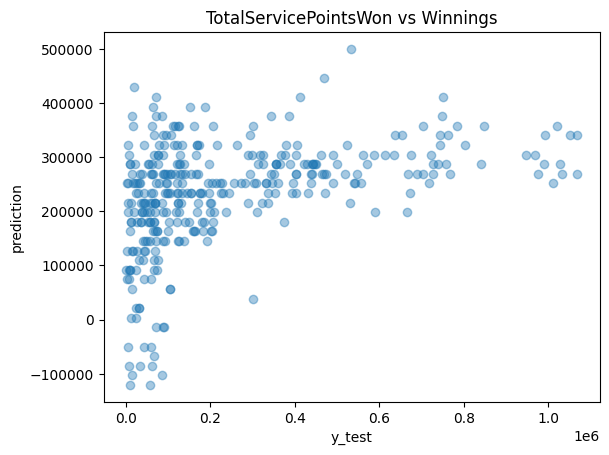

<Figure size 640x480 with 0 Axes>

In [12]:
x = df[["Aces"]]
y = df[["Winnings"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('Predicting Winnings with Aces Test Score:', model.score(x_test,y_test))
prediction = model.predict(x_test)
plt.scatter(y_test,prediction, alpha=0.4)
plt.title('Aces vs Winnings')
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()
plt.clf()


x = df[["TotalServicePointsWon"]]
y = df[["Winnings"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('Predicting Winnings with TotalServicePointsWon Test Score:', model.score(x_test,y_test))
prediction = model.predict(x_test)
plt.scatter(y_test,prediction, alpha=0.4)
plt.title('TotalServicePointsWon vs Winnings')
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()
plt.clf()

Create a few linear regression models that use two features to predict Winnings. Which set of two features results in the best model?

Predicting Winnings with BreakPointsOpportunities and FirstServeReturnPointsWon Test Score: 0.7482590344712943


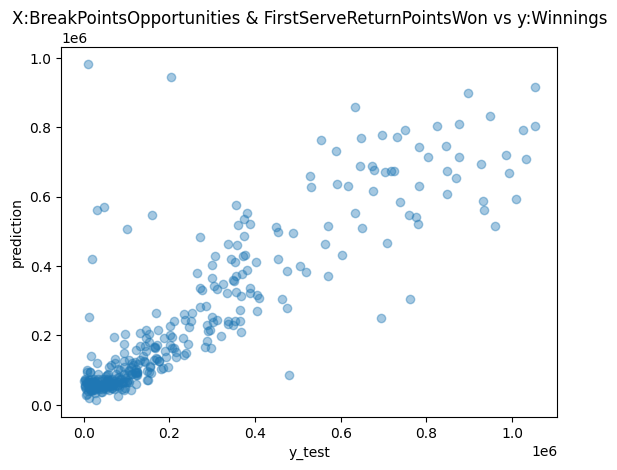

<Figure size 640x480 with 0 Axes>

In [14]:
## perform two feature linear regressions here:
x = df[['BreakPointsOpportunities','FirstServeReturnPointsWon']]
y = df[["Winnings"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)
print('Predicting Winnings with BreakPointsOpportunities and FirstServeReturnPointsWon Test Score:', model.score(x_test,y_test))
prediction = model.predict(x_test)
plt.scatter(y_test,prediction, alpha=0.4)
plt.title('X:BreakPointsOpportunities & FirstServeReturnPointsWon vs y:Winnings')
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()
plt.clf()


Create a few linear regression models that use multiple features to predict Winnings. Which set of features results in the best model?

Predicting Winnings with Multiple Features Test Score: 0.8245970205352813


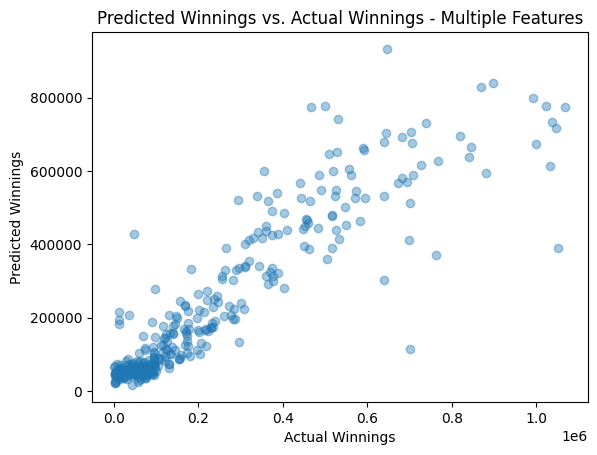

<Figure size 640x480 with 0 Axes>

In [13]:
## perform multiple feature linear regressions here:
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = df[['Winnings']]


# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, outcome, train_size = 0.8)
# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)
# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))
# make predictions with model
winnings_prediction = model.predict(features_test)
# plot predictions against actual winnings
plt.scatter(winnings_test,winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()